### Question 1:Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn

In [1]:
# importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing digits dataset from sklearn
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
# Viewing Description of digits dataset from sklearn
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print("Data is:\n",digits.data)
print("Images are:\n",digits.images)
print("Target is:\n",digits.target)
print("Target names are:\n",digits.target_names)

Data is:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Images are:
 [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2

In [5]:
# splitting the data in sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.2,random_state=0)

In [6]:
#scaling or normalizing the digits data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xtrain=scale.fit_transform(xtrain)
xtest=scale.fit_transform(xtest)

In [7]:
print(digits.data.shape) #shape of independent variabes in digits dataset
print(digits.target.shape) #shape of dependent variabes in digits dataset
print(xtrain.shape) #xtrain-independent varibles for training data shape
print(xtest.shape) #xtest-independent varibles for testing data shape
print(ytrain.shape) #ytrain-dependent varibles for training data shape
print(ytest.shape) #ytest-dependent varibles for testing data shape

(1797, 64)
(1797,)
(1437, 64)
(360, 64)
(1437,)
(360,)


In [8]:
# importing logistic regression library from sklearn to apply loagistic regression algorithm for digits dataset
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [9]:
# fit the model to the training data and predict the target
log_reg.fit(xtrain,ytrain)
ypred=log_reg.predict(xtest)
print(ypred)

c:\users\saibhagavan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saibhagavan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 0 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 1 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 8 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [10]:
# Displaying confusion matrix for Actual and Predicted values
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(ytest,ypred)
conf_matrix

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 1,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  1,  1,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  1, 37]], dtype=int64)

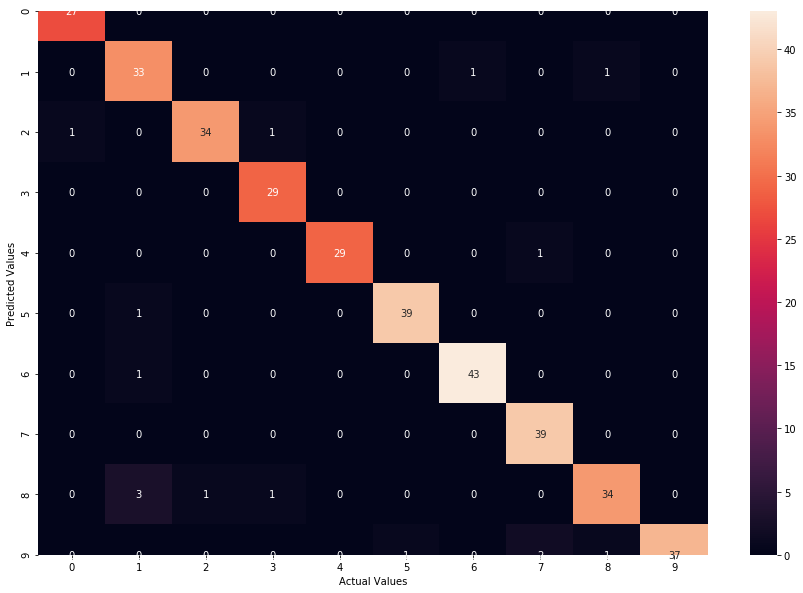

In [13]:
# plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [14]:
# calculating the accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ytest,ypred)
print("Accuracy score of the digits dataset is:\n",accuracy*100)

Accuracy score of the digits dataset is:
 95.55555555555556


### Classification Report

In [16]:
from sklearn.metrics import classification_report
report=classification_report(ytest,ypred)
print("Classification report of digits dataset using Logistic regression is:\n",report)

Classification report of digits dataset using Logistic regression is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.87      0.94      0.90        35
           2       0.97      0.94      0.96        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       1.00      0.90      0.95        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Accuracy score of the digits dataset using logistic regression is 95.55%